In [10]:
from radiomics import featureextractor

import six, numpy as np
print("done")

done


In [27]:
import os
import SimpleITK as sitk

from radiomics import getTestCase

imagepath_1, labelpath_1 = getTestCase('brain1')
imagepath_2, labelpath_2 = getTestCase('brain2')

image_1 = sitk.ReadImage(imagepath_1)
label_1 = sitk.ReadImage(labelpath_1)
image_2 = sitk.ReadImage(imagepath_2)
label_2 = sitk.ReadImage(labelpath_2)


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(sitk.GetArrayFromImage(image_1)[12,:,:], cmap="gray")
plt.title("Brain #1")
plt.subplot(2,2,2)
plt.imshow(sitk.GetArrayFromImage(image_1)[12,:,:])
plt.title("Segmentation #1")

plt.subplot(2,2,3)
plt.imshow(sitk.GetArrayFromImage(image_2)[8,:,:], cmap="gray")
plt.title("Brain #2")
plt.subplot(2,2,4)
plt.imshow(sitk.GetArrayFromImage(image_2)[8,:,:])
plt.title("Segmentation #2")

plt.show()

<Figure size 2000x2000 with 4 Axes>

In [13]:
import os

params = os.path.join(os.getcwd(), 'example_settings', 'Params.yaml')

extractor = featureextractor.RadiomicsFeatureExtractor(params)
result_1 = extractor.execute(image_1, label_1)
result_2 = extractor.execute(image_2, label_2)

INFO:radiomics.featureextractor:Loading parameter file C:\Users\steve\OneDrive - University of Adelaide\Python Scripts\MRI_sarcoma_AI\example_settings\Params.yaml
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radio

In [14]:
feature_1 = np.array([])
feature_2 = np.array([])

for key, value in six.iteritems(result_1):
    if key.startswith("original_"):
        feature_1 = np.append(feature_1, result_1[key])
        feature_2 = np.append(feature_2, result_2[key])

In [15]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
plt.plot(feature_1)
plt.yscale('log')
plt.title('Features from brain #1')

plt.subplot(3,1,2)
plt.plot(feature_2)
plt.yscale('log')
plt.title("features from brain #2")

plt.subplot(3,1,3)
plt.plot(feature_1 - feature_2)
plt.yscale('log')
plt.title("Difference")

plt.show()

<Figure size 2000x2000 with 3 Axes>

In [22]:
# test opening nii images
import SimpleITK as sitk
import matplotlib.pyplot as plt
%matplotlib inline

image_1 = sitk.ReadImage('./data/STS_001/image.nii.gz')
plt.figure(figsize=(20,20))
plt.subplot(1,1,1)
plt.imshow(sitk.GetArrayFromImage(image_1)[12,:,:], cmap="gray")
plt.show()

<Figure size 2000x2000 with 1 Axes>

In [1]:
from dcmrtstruct2nii import dcmrtstruct2nii
import SimpleITK as sitk

reader = sitk.ImageSeriesReader()
# test_path = './test'
test_path = 'example_data/manifest-MjbMt99Q1553106146386120388/Soft-tissue-Sarcoma/STS_049/04-14-2002-NA-MRI-UNLISTED AREA-15202/9.000000-Axial FSET2 Fatsat LOWER TIB FIB - RESEARCH-91655'
# test_path = "C:/Users/steve/OneDrive - University of Adelaide/Python Scripts/MRI_sarcoma_AI/example_data/manifest-MjbMt99Q1553106146386120388/Soft-tissue-Sarcoma/STS_049/04-14-2002-NA-MRI-UNLISTED AREA-15202/9.000000-Axial FSET2 Fatsat LOWER TIB FIB - RESEARCH-30537"
#
# struct_path="./example_data/manifest-MjbMt99Q1553106146386120388/Soft-tissue-Sarcoma/STS_049/04-14-2002-NA-MRI-UNLISTED AREA-15202/1.000000-RTstructT2FS-36171/1-1.dcm"
#
# dcmrtstruct2nii(struct_path, test_path, './data1')
dicom_names = reader.GetGDCMSeriesFileNames(test_path)

reader.SetFileNames(dicom_names)

reader.Execute()


Please cite:
Thomas Phil, Thomas Albrecht, Skylar Gay, & Mathis Ersted Rasmussen. (2023). Sikerdebaard/dcmrtstruct2nii: dcmrtstruct2nii v5 (Version v5). Zenodo. https://doi.org/10.5281/zenodo.4037864



<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x000001AADD7142D0> >

In [24]:
import os
os.path.exists('example_data/manifest-MjbMt99Q1553106146386120388/Soft-tissue-Sarcoma/STS_049/04-14-2002-NA-MRI-UNLISTED AREA-15202/9.000000-Axial FSET2 Fatsat LOWER TIB FIB - RESEARCH-30537')

True

In [3]:
from src.dataset import convert_wiki2nii

convert_wiki2nii("example_data/manifest-MjbMt99Q1553106146386120388/t2stirmetadata.csv",
                 "./example_data/manifest-MjbMt99Q1553106146386120388/",
                 "./data/")

100%|██████████| 51/51 [02:20<00:00,  2.75s/it]


In [28]:
import SimpleITK as sitk
from radiomics import featureextractor

import os

params = os.path.join(os.getcwd(), 'example_settings', 'Params.yaml')

label = sitk.ReadImage("data/STS_001/mask_GTV_Edema.nii.gz")
image = sitk.ReadImage("data/STS_001/image.nii.gz")

extractor = featureextractor.RadiomicsFeatureExtractor(params)
result = extractor.execute(image, label, 255)

INFO:radiomics.featureextractor:Loading parameter file C:\Users\steve\OneDrive - University of Adelaide\Python Scripts\MRI_sarcoma_AI\example_settings\Params.yaml
INFO:radiomics.featureextractor:Calculating features with label: 255
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing gldm


In [35]:
print(np.unique(sitk.GetArrayFromImage(label)))

[  0 255]


In [5]:
from autorad.utils.preprocessing import get_paths_with_separate_folder_per_case
root_dir = './data'

paths_df = get_paths_with_separate_folder_per_case(root_dir, relative=True, image_stem='image', mask_stem='mask_GTV_Mass')

paths_df

,ID,image_path,segmentation_path
0,STS_001,STS_001\image.nii.gz,STS_001\mask_GTV_Mass.nii.gz
1,STS_002,STS_002\image.nii.gz,STS_002\mask_GTV_Mass.nii.gz
2,STS_003,STS_003\image.nii.gz,STS_003\mask_GTV_Mass.nii.gz
3,STS_004,STS_004\image.nii.gz,STS_004\mask_GTV_Mass.nii.gz
4,STS_005,STS_005\image.nii.gz,STS_005\mask_GTV_Mass.nii.gz
5,STS_006,STS_006\image.nii.gz,STS_006\mask_GTV_Mass.nii.gz
6,STS_007,STS_007\image.nii.gz,STS_007\mask_GTV_Mass.nii.gz
7,STS_008,STS_008\image.nii.gz,STS_008\mask_GTV_Mass.nii.gz
8,STS_009,STS_009\image.nii.gz,STS_009\mask_GTV_Mass.nii.gz
9,STS_010,STS_010\image.nii.gz,STS_010\mask_GTV_Mass.nii.gz


ValueError: attempt to get argmax of an empty sequence

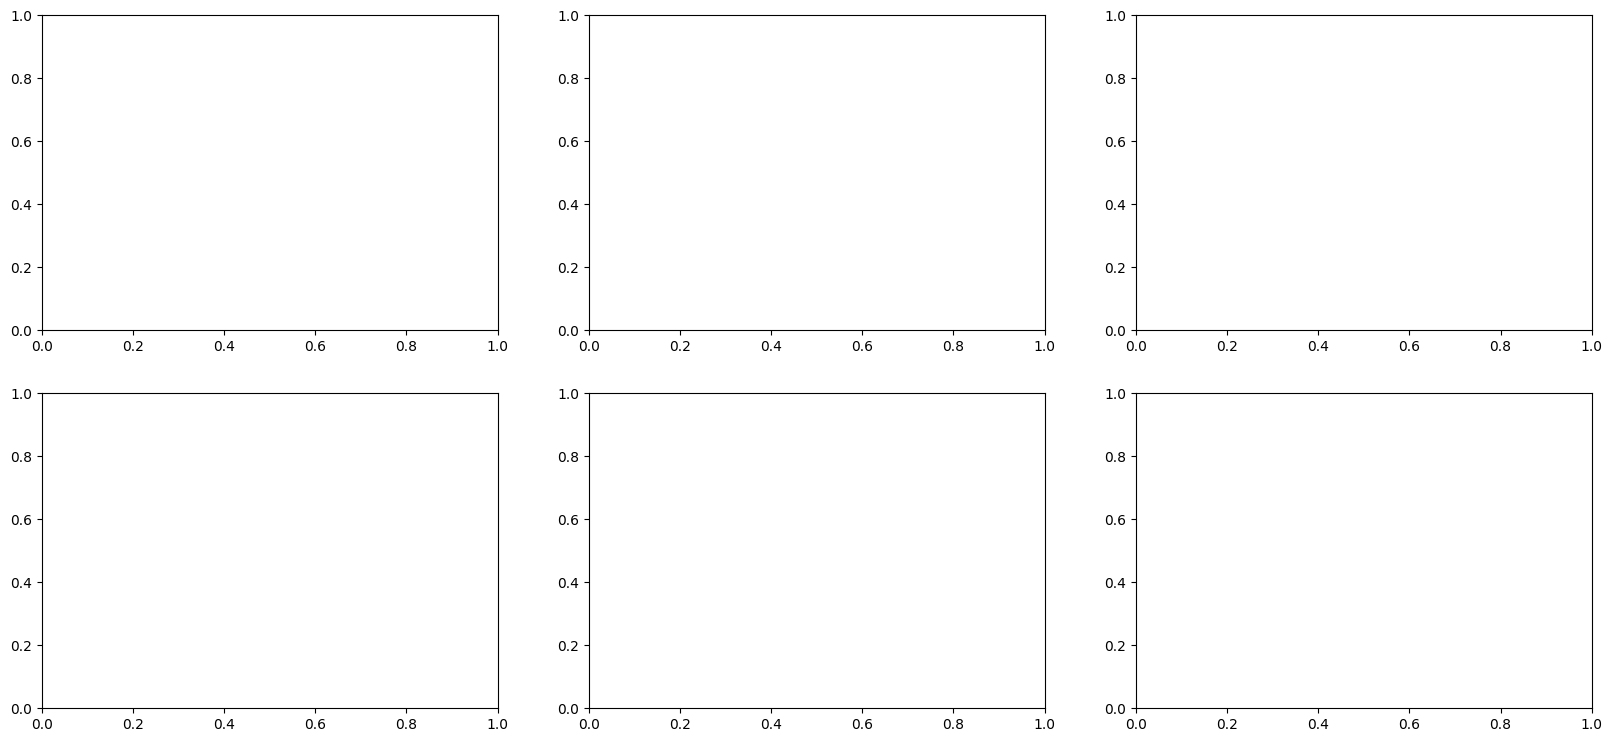

In [4]:
from autorad.data import ImageDataset
import logging

logging.getLogger().setLevel(logging.ERROR)

image_dataset = ImageDataset(
    paths_df,
    ID_colname='ID',
    root_dir=root_dir
)

image_dataset.plot_examples(n=5, window=None)